In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import plotly.express as px

In [2]:
set3 = pd.read_csv('subset-3-sous-ensemble-3.csv', encoding='ISO-8859-1')
set3.columns

Index(['LEVEL1ID', 'LEVEL2ID', 'LEVEL3ID', 'LEVEL4ID', 'LEVEL5ID', 'SURVEYR',
       'BYCOND', 'DESCRIP_E', 'DESCRIP_F', 'DEMCODE', 'QUESTION', 'TITLE_E',
       'TITLE_F', 'ANSWER1', 'ANSWER2', 'ANSWER3', 'ANSWER4', 'ANSWER5',
       'ANSWER6', 'ANSWER7', 'MOST_POSITIVE_OR_LEAST_NEGATIVE',
       'NEUTRAL_OR_MIDDLE_CATEGORY', 'MOST_NEGATIVE_OR_LEAST_POSITIVE',
       'AGREE', 'SCORE5', 'SCORE100', 'ANSCOUNT', 'DEPT_E', 'DEPT_F',
       'INDICATORID', 'INDICATORENG', 'INDICATORFRA', 'SUBINDICATORID',
       'SUBINDICATORENG', 'SUBINDICATORFRA'],
      dtype='object')

## Data Cleaning
- Remove ***French*** columns for readibility for our group
- Remove Questions' ***Indicator ID & sub Indicator ID*** columns
- Remove ***Most Positive... , Most Negative... , and Neutral...*** columns
- Remove ***level 2-5 id*** columns
- Remove empty Answers 1-7 rows

### Levels 2-5 ID are all 0

In [3]:
all_levels = set3[['LEVEL2ID', 'LEVEL3ID','LEVEL4ID','LEVEL5ID']]
non_zero_rows = len(all_levels[(all_levels != 0).all(axis=1)])
print(f'# rows where level 2-5 are not all empty:   {non_zero_rows}')
all_levels

# rows where level 2-5 are not all empty:   0


,LEVEL2ID,LEVEL3ID,LEVEL4ID,LEVEL5ID
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1405574,0,0,0,0
1405575,0,0,0,0
1405576,0,0,0,0
1405577,0,0,0,0


- Remove French columns for readibility for our group
- remove Questions' Indicator ID & sub Indicator ID columns
- Get rid of level 2-5 id columns

In [4]:
# print(set3[set3.LEVEL2ID!=0])
# descrip = list(set3.DESCRIP_E.unique())
set3 = set3.drop(columns=['LEVEL2ID', 'LEVEL3ID','LEVEL4ID','LEVEL5ID','DESCRIP_F','TITLE_F','DEPT_F', 'INDICATORFRA','SUBINDICATORFRA', 'INDICATORID', 'SUBINDICATORID', 'MOST_POSITIVE_OR_LEAST_NEGATIVE', 'NEUTRAL_OR_MIDDLE_CATEGORY', 'MOST_NEGATIVE_OR_LEAST_POSITIVE'])
set3.columns

Index(['LEVEL1ID', 'SURVEYR', 'BYCOND', 'DESCRIP_E', 'DEMCODE', 'QUESTION',
       'TITLE_E', 'ANSWER1', 'ANSWER2', 'ANSWER3', 'ANSWER4', 'ANSWER5',
       'ANSWER6', 'ANSWER7', 'AGREE', 'SCORE5', 'SCORE100', 'ANSCOUNT',
       'DEPT_E', 'INDICATORENG', 'SUBINDICATORENG'],
      dtype='object')

## Delete rows that have no survey data (more than 50%) 1.4M -> 0.8M rows
- Some departments don't have certain equity groups. That means 0 in ANSWER 1-7 for non-exist equity group. 

In [5]:
all_answers = set3[['ANSWER1', 'ANSWER2','ANSWER3','ANSWER4', 'ANSWER5', 'ANSWER6', 'ANSWER7']]
answered_rows = all_answers[(all_answers != ' ').all(axis=1)]
unAnswered_rows = all_answers[(all_answers == ' ').all(axis=1)]
set3_cleaned = set3.iloc[answered_rows.index]
print(f'# rows that has no ANSWER 1-7:   {len(unAnswered_rows)}')
answered_rows
set3.iloc[unAnswered_rows.index].head()
# set3_2020.to_csv('subset3_2020_cleaned.csv')

# rows that has no ANSWER 1-7:   822456


,LEVEL1ID,SURVEYR,BYCOND,DESCRIP_E,DEMCODE,QUESTION,TITLE_E,ANSWER1,ANSWER2,ANSWER3,...,ANSWER5,ANSWER6,ANSWER7,AGREE,SCORE5,SCORE100,ANSCOUNT,DEPT_E,INDICATORENG,SUBINDICATORENG
141,5,2020,Q115 = 3,Gender diverse,2013,Q01,"Question 1. I have the tools, technology and e...",,,,...,,,,,,,,Fisheries and Oceans Canada,WORKPLACE,Physical environment and equipment
146,10,2020,Q115 = 3,Gender diverse,2013,Q01,"Question 1. I have the tools, technology and e...",,,,...,,,,,,,,"Innovation, Science and Economic Development C...",WORKPLACE,Physical environment and equipment
148,12,2020,Q115 = 3,Gender diverse,2013,Q01,"Question 1. I have the tools, technology and e...",,,,...,,,,,,,,Transport Canada,WORKPLACE,Physical environment and equipment
150,14,2020,Q115 = 3,Gender diverse,2013,Q01,"Question 1. I have the tools, technology and e...",,,,...,,,,,,,,Global Affairs Canada,WORKPLACE,Physical environment and equipment
151,15,2020,Q115 = 3,Gender diverse,2013,Q01,"Question 1. I have the tools, technology and e...",,,,...,,,,,,,,Natural Resources Canada,WORKPLACE,Physical environment and equipment


## Demographic Groups: 
- We have 59 demograohic groups
- This include non selected groups: eg. "Chinese" vs. "Chinese - Not selected"

In [6]:
# There are 59 equity groups
print(f'We have {len(set3.DESCRIP_E.unique())} demographic groups')
list(set3.DESCRIP_E.unique())

We have 59 demographic groups


['Male gender',
 'Female gender',
 'Gender diverse',
 'Indigenous',
 'Non-Indigenous',
 'First Nation (North American Indian)',
 'Métis',
 'Inuk (Inuit)',
 'Person with a disability',
 'Not a person with a disability',
 'A seeing disability affects vision, including total blindness, partial sight and visual distortion',
 'A seeing disability affects vision, including total blindness, partial sight and visual distortion - Not selected',
 'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion',
 'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion - Not selected',
 'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other issues impacting your mobility',
 'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other issues impacting your mobility - Not selected',


## Take year 2020 data
- 2020 has 330k rows
- 2019 has 176k rows
- 2018 has 76k rows

In [7]:
# print(set3.columns)
print(set3_cleaned.SURVEYR.unique())
print(f'2020: {len(set3_cleaned[set3_cleaned.SURVEYR==2020])} rows')
print(f'2019: {len(set3_cleaned[set3_cleaned.SURVEYR==2019])} rows')
print(f'2018: {len(set3_cleaned[set3_cleaned.SURVEYR==2018])} rows')

# have majority of data form 2020 so we focus on this year
set3_2020 = set3_cleaned[set3_cleaned.SURVEYR==2020]

[2020 2019 2018]
2020: 330739 rows
2019: 176361 rows
2018: 76023 rows


### number of equity groups in all 68 departments
- min = 2 (some department only have male & female?)
- max = 59 (all equity groups in the survey)

In [8]:
set3_2020['DEPT_E'].unique()
print('by # of equity groups surveyedin departments')
dept_equity = pd.Series(dtype=int)
for dept in set3_2020['DEPT_E'].unique():
    num_equity_groups = len(set3_2020[set3_2020['DEPT_E']==dept].DESCRIP_E.unique())
    dept_equity[dept] = num_equity_groups
dept_equity.describe()

by # of equity groups surveyedin departments


count    68.000000
mean     37.720588
std      16.127149
min       2.000000
25%      25.000000
50%      38.500000
75%      53.000000
max      59.000000
dtype: float64

In [29]:
dept_equity.sort_values()
dept_equity

Public Service                                              59
Canada Revenue Agency                                       57
Employment and Social Development Canada                    59
Department of National Defence                              59
Correctional Service Canada                                 59
                                                            ..
Administrative Tribunals Support Service of Canada          24
National Film Board of Canada                               16
Federal Economic Development Agency for Southern Ontario    17
Statistical Survey Operations                               45
Micro-organizations combined                                40
Length: 68, dtype: int64

<Figure size 720x720 with 0 Axes>

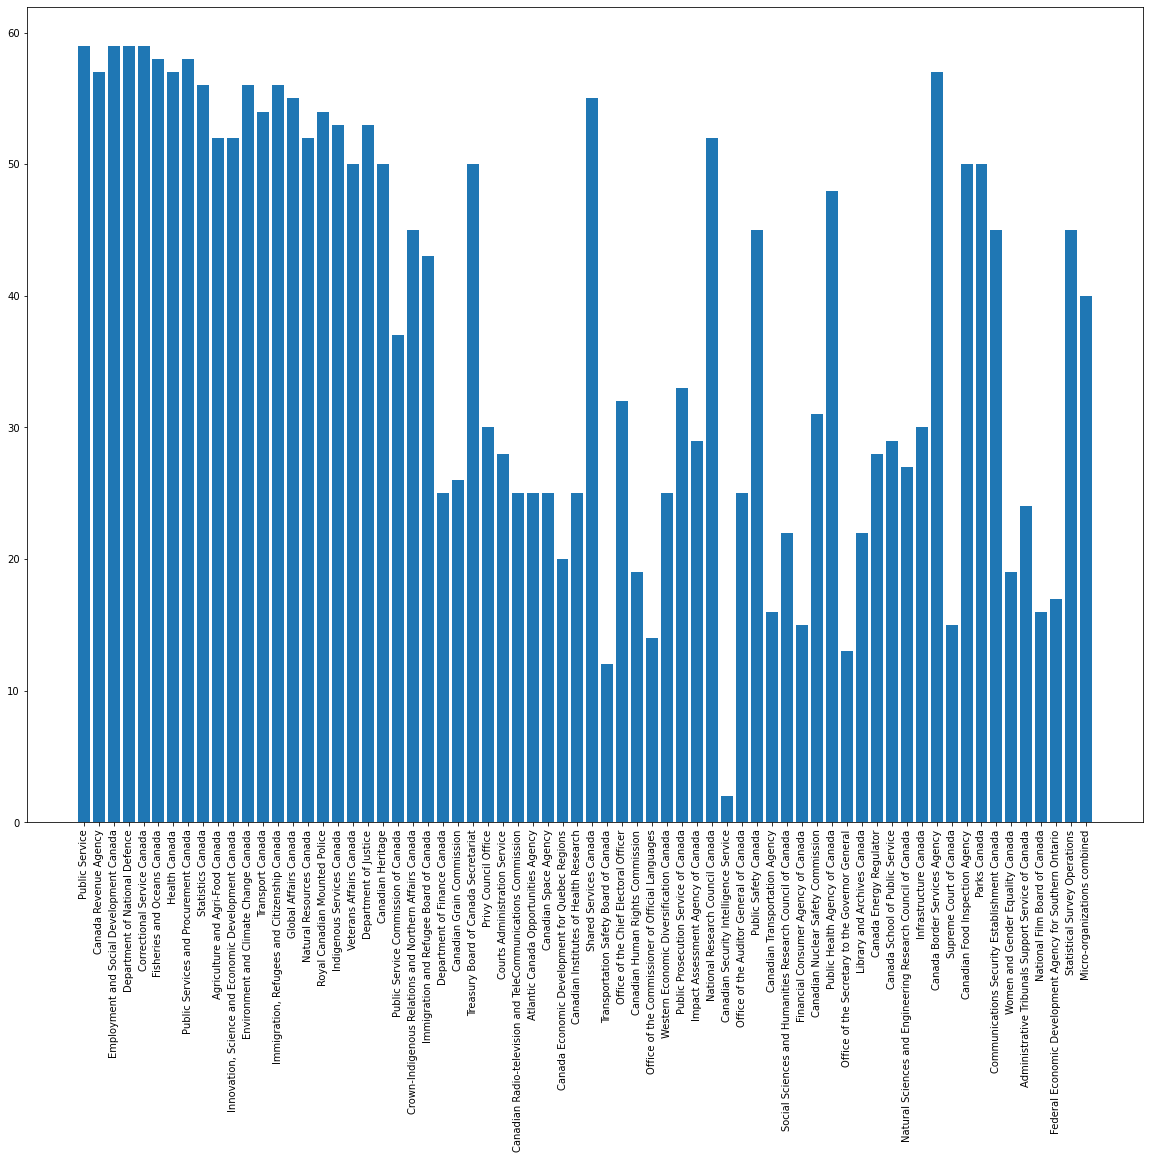

<Figure size 720x720 with 0 Axes>

In [24]:
plt.rcParams["figure.figsize"] = (20,15)
plt.bar(dept_equity.index, dept_equity)
plt.xticks(rotation=90) 
plt.figure(figsize=(10, 10))

### Look at the department that has only 2 equity groups
- Looks like it's just female & male
- We can't assume other things, but only the gender of surveyed people in that department
- but how is that possible when "Not Selected" is also an attribute value   -_-|||
- Gonna ignore the "not selected" groups

In [11]:
dept_2 = dept_equity[dept_equity == 2].index[0]
print(dept_2)
set3_2020[set3_2020['DEPT_E']==dept_2]['DESCRIP_E'].unique()

Canadian Security Intelligence Service


array(['Male gender', 'Female gender'], dtype=object)

### Look at how many equity group has 'Not Selected'
- Let's see if there's rows selected **"... - Not selected"**

In [12]:
descrip = list(set3.DESCRIP_E.unique())
selected = []
not_selected = []
for group in descrip:
    if ("Not selected" in group):
        not_selected.append(group)
    else:
        selected.append(group)
        
print(f'Not selected - {len(not_selected)}')
print(f'Selected - {len(selected)}')
print()
num_not_Chinese = len(set3_2020[set3_2020['DESCRIP_E']=='Chinese - Not selected'])
print(f"Is there rows with '...- Not selected'? -- YES \n{num_not_Chinese} rows with 'Chinese - Not selected'", )
not_selected


Not selected - 21
Selected - 38

Is there rows with '...- Not selected'? -- YES 
6276 rows with 'Chinese - Not selected'


['A seeing disability affects vision, including total blindness, partial sight and visual distortion - Not selected',
 'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion - Not selected',
 'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other issues impacting your mobility - Not selected',
 'An issue with flexibility or dexterity affects ability to move joints or perform motor tasks, especially with your hands - Not selected',
 'A mental health issue affects psychology or behaviour, such as anxiety, depression or social / compulsive disorder or phobia or psychiatric illness - Not selected',
 'A sensory / environmental disability affects sensitivity to light, sounds or other distractions, as well as allergens and other environmental sensitivities - Not selected',
 "A chronic health condition or pain affects ability to function on a regular or episodic basis due to mi

In [34]:
dept_equity_dict = dept_equity.to_dict()
for dept, count in dept_equity_dict.items():
    if dept in selected:
        print(dept)
        plt.bar(dept, count)

{'Public Service': 59,
 'Canada Revenue Agency': 57,
 'Employment and Social Development Canada': 59,
 'Department of National Defence': 59,
 'Correctional Service Canada': 59,
 'Fisheries and Oceans Canada': 58,
 'Health Canada': 57,
 'Public Services and Procurement Canada': 58,
 'Statistics Canada': 56,
 'Agriculture and Agri-Food Canada': 52,
 'Innovation, Science and Economic Development Canada': 52,
 'Environment and Climate Change Canada': 56,
 'Transport Canada': 54,
 'Immigration, Refugees and Citizenship Canada': 56,
 'Global Affairs Canada': 55,
 'Natural Resources Canada': 52,
 'Royal Canadian Mounted Police': 54,
 'Indigenous Services Canada': 53,
 'Veterans Affairs Canada': 50,
 'Department of Justice': 53,
 'Canadian Heritage': 50,
 'Public Service Commission of Canada': 37,
 'Crown-Indigenous Relations and Northern Affairs Canada': 45,
 'Immigration and Refugee Board of Canada': 43,
 'Department of Finance Canada': 25,
 'Canadian Grain Commission': 26,
 'Treasury Board 

In [13]:
additional_selected = []
for i in selected:
    included = False
    for j in not_selected:
        if i in j:
            included = True
    if not included:
        additional_selected.append(i)
len(additional_selected)
additional_selected

['Male gender',
 'Female gender',
 'Gender diverse',
 'Non-Indigenous',
 'First Nation (North American Indian)',
 'Métis',
 'Inuk (Inuit)',
 'Person with a disability',
 'Not a person with a disability',
 'Visible minority',
 'Non-visible minority',
 'Heterosexual',
 'Gay or lesbian',
 'Bisexual',
 'Another sexual orientation',
 'Prefer not to answer']

In [14]:
print(set3.columns)

question_groups = set3_2020[['QUESTION', 'TITLE_E','INDICATORENG','SUBINDICATORENG']].drop_duplicates()
question_groups[question_groups['QUESTION']=='Q26']
question_groups = question_groups.convert_dtypes()


Index(['LEVEL1ID', 'SURVEYR', 'BYCOND', 'DESCRIP_E', 'DEMCODE', 'QUESTION',
       'TITLE_E', 'ANSWER1', 'ANSWER2', 'ANSWER3', 'ANSWER4', 'ANSWER5',
       'ANSWER6', 'ANSWER7', 'AGREE', 'SCORE5', 'SCORE100', 'ANSCOUNT',
       'DEPT_E', 'INDICATORENG', 'SUBINDICATORENG'],
      dtype='object')


## Look into Q60,61 & 91

In [15]:
# # get actual responses for each question
# def get_responses(q):
#     return df_responses.query(f"QUESTION == '{q}'")[['Answer1ENG','Answer2ENG','Answer3ENG','Answer4ENG','Answer5ENG','Answer6ENG','Answer7ENG']].values[0]

# # get demographic codes for each question
# def get_demo_descrip(demo_codes):
#     dict_codes = {}
#     for i in demo_codes:
#         dict_codes[i] = df_emp_survey.query(f"BYCOND == '{i}'")['DESCRIP_E'].iloc[0]
#     return dict_codes

# # get data frame results for a question
# def get_results(q, demo_code):
#     # get men, women and gender diverse answer pools for a question on average across all dept
#     idx_cols = get_demo_descrip(df_emp_survey.query(f"BYCOND_2 == '{demo_code}' and QUESTION == '{q}'").groupby('BYCOND').mean()[ans_cols].index)
#     df_resp_score = df_emp_survey.query(f"BYCOND_2 == '{demo_code}' and QUESTION == '{q}'").groupby('BYCOND').mean()[ans_cols]
#     responses = get_responses(q)

#     # replace values
#     df_resp_score.rename(index=idx_cols, inplace=True)
#     df_resp_score.columns = responses

#     return df_resp_score

In [16]:
# question_groups = question_groups.astype(str)
q60 = question_groups[question_groups['QUESTION']=='Q60']
print(q60['TITLE_E'].iloc[0])




Question 60. I am satisfied with how matters related to harassment are resolved in my department or agency.


In [17]:
q61 = question_groups[question_groups['QUESTION']=='Q61']
print(q61['TITLE_E'].iloc[0])

Question 61. My department or agency works hard to create a workplace that prevents harassment.


In [18]:
q91 = question_groups[question_groups['QUESTION']=='Q91']
print(q91['TITLE_E'].iloc[0])

Question 91. I am satisfied with the workplace accommodation measures that were implemented.
